In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
df = pd.read_csv('almaty-us embassy.csv')
df2 = pd.read_csv('astana-us embassy.csv')
df.rename(columns={' pm25':'pm25'},inplace = True)
df2.rename(columns={' pm25':'pm25'},inplace = True)

In [4]:
df['date'] = df['date'].apply(lambda x:pd.to_datetime(x))
df2['date'] = df2['date'].apply(lambda x:pd.to_datetime(x))

In [21]:
df.head()

,date,pm25
0,2020-10-01,73
1,2020-10-02,85
2,2020-10-03,77
3,2020-10-04,56
4,2020-10-05,52


In [81]:
df2.head()

,date,pm25
0,2020-10-01,227
1,2020-10-02,150
2,2020-10-03,71
3,2020-10-04,57
4,2020-10-05,83


In [5]:
df.sort_values(by=['date'],inplace=True)
df = df.set_index('date')
df2.sort_values(by=['date'],inplace=True)
df2 = df2.set_index('date')

In [69]:
df.describe()

,pm25
count,228.000000
mean,56.043860
std,28.639454
min,17.000000
25%,35.000000
50%,48.000000
75%,73.250000
max,167.000000


In [6]:
df2_weeks = df2['2020-02-10':'2020-10-28'].resample('w').mean()
df2_weeks.fillna(df.iloc[:,0].mean(),inplace=True)
df2_weeks.head()

,pm25
date,
2020-02-16,70.000000
2020-02-23,67.428571
2020-03-01,49.285714
2020-03-08,56.714286
2020-03-15,37.500000


In [7]:
df1_weeks = df.resample('w').mean()
df1_weeks.fillna(df.iloc[:,0].mean(),inplace=True)
df1_weeks.head()

,pm25
date,
2020-02-16,89.428571
2020-02-23,106.000000
2020-03-01,84.666667
2020-03-08,83.714286
2020-03-15,102.285714


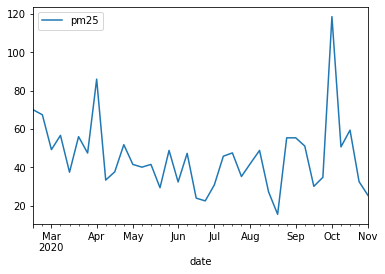

In [93]:
df2_weeks.plot()

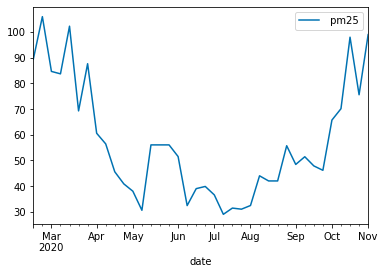

In [82]:
df1_weeks.plot()

In [12]:
df1_weeks['pm25']

date
2020-02-16     89.428571
2020-02-23    106.000000
2020-03-01     84.666667
2020-03-08     83.714286
2020-03-15    102.285714
2020-03-22     69.285714
2020-03-29     87.666667
2020-04-05     60.571429
2020-04-12     56.428571
2020-04-19     45.571429
2020-04-26     40.857143
2020-05-03     38.000000
2020-05-10     30.571429
2020-05-17     56.043860
2020-05-24     56.043860
2020-05-31     56.043860
2020-06-07     51.500000
2020-06-14     32.400000
2020-06-21     39.000000
2020-06-28     39.857143
2020-07-05     36.571429
2020-07-12     29.000000
2020-07-19     31.428571
2020-07-26     31.000000
2020-08-02     32.428571
2020-08-09     44.000000
2020-08-16     42.000000
2020-08-23     42.000000
2020-08-30     55.714286
2020-09-06     48.428571
2020-09-13     51.428571
2020-09-20     47.857143
2020-09-27     46.142857
2020-10-04     65.714286
2020-10-11     70.142857
2020-10-18     98.000000
2020-10-25     75.571429
2020-11-01     99.000000
Freq: W-SUN, Name: pm25, dtype: float64

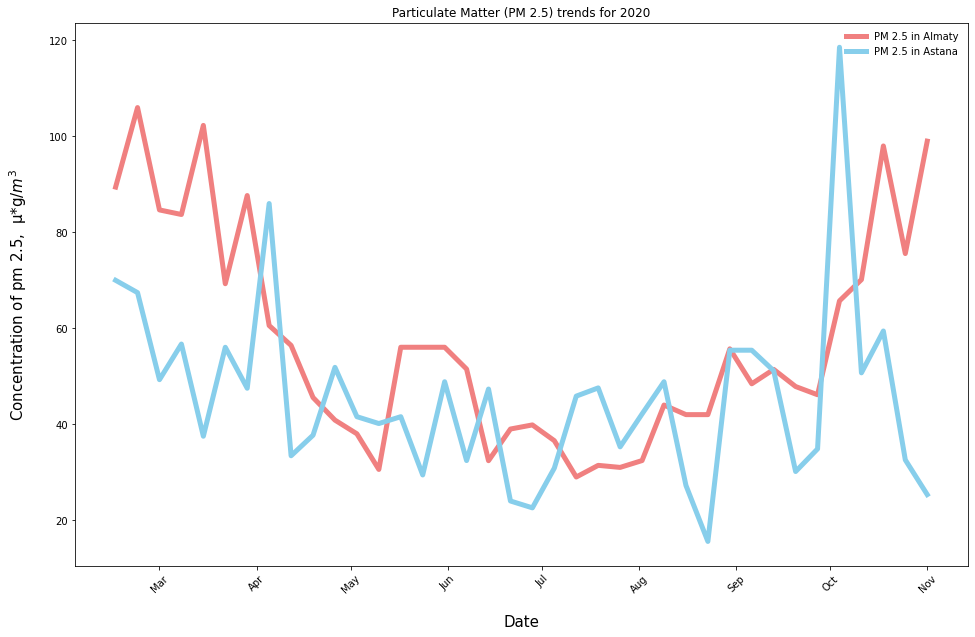

In [15]:
f, ax = plt.subplots(figsize=(16,10))
ax.plot(df1_weeks.index, df1_weeks['pm25'], color='lightcoral',linewidth=5)
ax.plot(df2_weeks.index, df2_weeks['pm25'], color='skyblue', linewidth=5)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Concentration of pm 2.5,  \u03BC*g/$m^{3}$', fontsize=15)
plt.title('Particulate Matter (PM 2.5) trends for 2020')
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
xfmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(xfmt)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.legend(['PM 2.5 in Almaty', 'PM 2.5 in Astana'], loc='best', frameon=False)